<a href="https://colab.research.google.com/github/jinSloth/test1/blob/master/%5BWM_01%5D_4_Meaching_Learning_part_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [0]:
import glob
import imageio
import pandas as pd
import os
import re
from tqdm import tqdm
from tqdm import tnrange
import numpy as np

In [0]:
##코랩에서 사용할 떄 

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder_path = "/content/gdrive/My Drive/train/classification/"
remove_len = len('/content/gdrive/My Drive/train/classification/') #####숫자가 나오기 전까지 글자가 몇 개인지~
##동일한 코드 들을 실행안시켜주면 된다.


# Data Load

In [0]:
folder_path = '/home/ubunt/wav2mid/data/cnn inputs/*'

In [0]:
remove_len = len('/home/ubunt/wav2mid/data/cnn inputs/')
remove_len

36

In [0]:
# 폴더(음 조합)의 개수
a=glob.glob(folder_path + "*")
len(a)

6746

In [0]:
# Y_list : one-hot 처리된 라벨링 정보
Y_list=[]
list88=[str(i) for i in range(21,109)]

for i in tnrange(len(a)):
    Y=np.zeros(len(list88))
    find=re.findall("[0-9]+", str(a[i][remove_len:])) #i번 폴더의 이름에 들어가는 숫자를 전부 추출
    for k in range(len(find)):
        Y[list88.index(find[k])]=1

    for _ in glob.glob(a[i]+"/*.jpg"):
        Y_list.append(Y)

In [0]:
#@# 너무 느려서
b=[]
c=[]

for i in tnrange(len(a)):
  im=glob.glob(a[i]+"/*.jpg")
  b.append(im)
  c.append(len(im))

In [0]:
d=[]
dataset=[]
for i in tnrange(len(a)):
  for image_path in b[i]: #####각 라벨 폴더에서 이미지 가져오가 
        d.append(image_path)
        

NameError: ignored

In [0]:

dataset=[]
for i in tnrange(len(d)):
  
  im = imageio.imread(d[i])
  dataset.append(im)

In [0]:
len(d[4:5])

1

In [0]:
# 이미지 가져오기 v4
val_list=[]
idx=0

for i in  tqdm(c):
    
    classes=[]
    data=dataset[idx:idx+i]
    idx=idx+i
    # image load
    for ima in data:
        classes.append(im)
        
    # 변수 할당 val_list_50 = 라벨 50
    globals()['val_list_' + str(a[i][remove_len:])] = classes 
    val_list.append(globals()['val_list_' + str(a[i][remove_len:])])

In [0]:
from tqdm import tqdm

In [0]:
# 이미지 가져오기 v3
val_list=[]
idx=0

for i in  tqdm(c):
    
    classes=[]
    data=d[idx:idx+i]
    idx=idx+i
    # image load
    for image_path in data:
        im = imageio.imread(image_path)
        classes.append(im)
        
    # 변수 할당 val_list_50 = 라벨 50
    globals()['val_list_' + str(a[i][remove_len:])] = classes 
    val_list.append(globals()['val_list_' + str(a[i][remove_len:])])

 31%|███       | 2061/6746 [05:29<29:22,  2.66it/s]

KeyboardInterrupt: ignored

In [0]:
# 이미지 가져오기 v2
val_list=[]
for i in tnrange(len(a)):
    classes=[]
    # image load
    for image_path in b[i]:
        im = imageio.imread(image_path)
        classes.append(im)
        
    # 변수 할당 val_list_50 = 라벨 50
    globals()['val_list_' + str(a[i][remove_len:])] = classes 
    val_list.append(globals()['val_list_' + str(a[i][remove_len:])])

KeyboardInterrupt: ignored

In [0]:
# 이미지 가져오기
val_list=[]
for i in tnrange(len(a)):
    classes=[]
    # image load
    for image_path in glob.glob(a[i]+"/*.jpg"):
        im = imageio.imread(image_path)
        classes.append(im)
        
    # 변수 할당 val_list_50 = 라벨 50
    globals()['val_list_' + str(a[i][remove_len:])] = classes 
    val_list.append(globals()['val_list_' + str(a[i][remove_len:])])

NameError: ignored

In [0]:
# image shape
print(val_list[0][1].shape)
# label cnt
len(val_list)

# KNN

#### KNN을 이용하여 빈번하게 사용되지 않는 음을 가장 유사한 main 음으로 할당하였다.

In [0]:
# 각 폴더의 이미지 개수
val_len_list=[len(val_list[i]) for i in range(len(val_list))]

In [0]:
# unique 라벨
class_list = []
for i in range(len(val_list)) :
    class_list.append(a[i][remove_len:])
print(class_list[:6])

['64_67_82', '48_56', '51_54_58_63_70_75_78_82', '47_62_66_71', '46_58_86', '42_51']


In [0]:
# 폴더별 데이터 개수를 파악하기 위한 data frame
df = pd.DataFrame({'음': class_list,'갯수': val_len_list})

KeyboardInterrupt: 

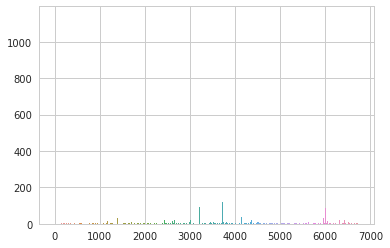

In [0]:
# 시각화
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.barplot(x='음', y='갯수', data=df)

In [0]:
# 다른 클래스에 할당되는 기준 
freq_crit = 2
# 눌린 음 경우의 수에 따라 기준을 달리 적용해야하는 것 고려 * 

In [0]:
# 확인
df.iloc[0:2] 

,음,갯수
0,64_67_82,16
1,48_56,3


In [0]:
main=list(df[df['갯수'] >= freq_crit]['음']) # 클래스로 남을 "음"
sub=list(df[df['갯수'] < freq_crit]['음'])  # 흡수될 음

main_index=list(df[df['갯수'] >= freq_crit]['음'].index) # 클래스로 남을 "음"의 인덱스
sub_index=list(df[df['갯수'] < freq_crit]['음'].index)  # 흡수될 음의 인덱스 

In [0]:
# 기준별 main과 sub의 개수
print(len(main),len(sub))

## 전체 이미지 개수 대비 하위 n% 기준으로 삼아서 날려야 할 것 같음.
## 기준에 대한 보완 필요
## KNN은 모델의 성능에 어느정도 영향을 미치는지 파악하기 위함, 다음과 같이 해석하면 될 것 같음
## 좋게 나온다면 : 적은 데이터로 비슷한 성능을 통해 보다 빠른 학습 및 knn시사점 발견
## 나쁘게 나온다면 : multi label classification은 sigmoid를 사용하기에 각각의 분류기를 구축함에 있어 데이터 손실의 영향

3705 3041


#### KNN은 알고리즘 특성상 연산을 할 때 많은 메모리 및 연산비용이 크다.

#### 따라서 모든 데이터간의 거리를 연산하지 않고 각 라벨의 평균을 대표값으로 취하여 적용하였다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from PIL import Image  

In [0]:
mean_list=[]
for k in tnrange(len(val_list)): #폴더의 갯수만큼 반복
    n_component=len(val_list[k])
    # np.array로 바꿔서 연산(이미지 format은 ~255까지만 표현가능하여 합연산이 적용되지 않음)
    mean=np.array(val_list[k][0].copy(),dtype=np.int32)

    # 각 라벨의 평균 적용
    for i in range(1,n_component):
        mean=mean+np.array(val_list[k][i].copy()) 

    mean=mean/n_component 
    mean=(mean.round())
    mean=np.array(mean.copy(),dtype=np.uint8)
    #mean=Image.fromarray(mean,"RGB") # 다시 이미지로 변환
    mean_list.append(mean)

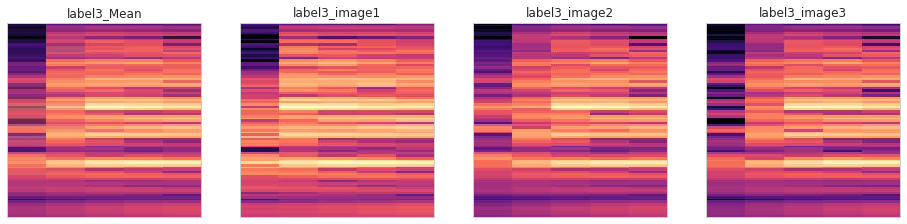

In [0]:
# 대표걊 확인
fig, axes = plt.subplots(1, 4, figsize=(16, 6), subplot_kw={'xticks': [], 'yticks': []})
axes[0].set_title("label3_Mean")
axes[0].imshow(mean_list[3], interpolation='nearest')
axes[1].set_title("label3_image1")
axes[1].imshow(val_list[3][0], interpolation='nearest')
axes[2].set_title("label3_image2")
axes[2].imshow(val_list[3][1], interpolation='nearest')
axes[3].set_title("label3_image3")
axes[3].imshow(val_list[3][2], interpolation='nearest')
plt.show()

In [0]:
# 거리 계산 함수, 유클리드 거리
def calculateDistance(i1, i2):
    return np.sum((i1-i2)**2)

In [0]:
# KNN 적용
# sub -> main 으로 할당
change_class_list=a.copy()
cnt = 0
for n in sub_index: ###타켓을 서브 안에서 뽑는다.
    which_min = []
    target = class_list[n]
    main_cp_list=[]
    sub_cp=re.findall("[0-9]+", class_list[n])

    for i in main_index:
        # label의 '_'제거, main_cp = [32,56]
        main_cp=re.findall("[0-9]+", class_list[i])
        
        # main이 sub의 부분집합인 경우 append
        if len(set(main_cp) - set(sub_cp)) == 0 :
            main_cp_list.append(class_list[i]) # class_list = "32_56"
                    
    # 위 조건을 충족한 main들의 class_list안에서의 index정보 추출
    main_cp_index=[]
    for k in range(len(main_cp_list)):
        main_cp_index.append(class_list.index(main_cp_list[k])) # class_list에서 main_cp_list[k]값을 갖고 있는 위치

    # 모든 main class와의 거리 측정
    for t in main_cp_index:
        which_min.append(calculateDistance(mean_list[n],mean_list[t]))

    cnt += 1
    # 가장 가까운 유클리드 거리를 갖는 class로 할당
    for q in range(len(main_cp_index)) :
        if which_min[q] == min(which_min) :
            change_class_list[n]=a[main_index[q]]
            if cnt % 50 == 0 :
                print(target,"Subscribe to",class_list[main_cp_index[q]])

43_48_55_63_67 Subscribe to 43_55_67
41_48_53 Subscribe to 41_53
44_49_53_61 Subscribe to 49_53_61
44_60_63_66 Subscribe to 60_66
44_56_84_88 Subscribe to 44_56
75_78_81_90 Subscribe to 75_78
68_76 Subscribe to 68
36_48_63_68_75 Subscribe to 36_48
65_68_74_77_80_86 Subscribe to 65_68_74
54_58_65 Subscribe to 54_58
52_64_80_88_92 Subscribe to 64_80
62_78_90 Subscribe to 78
58_61_63_67_70_77 Subscribe to 61_67_70_77
58_65_68_70_74_76 Subscribe to 65_76
67_71_79_86 Subscribe to 67_71_79
54_66_70_78_82 Subscribe to 54_66_70_78
33_75 Subscribe to 33
64_69_72_77 Subscribe to 72_77
51_63_73_80_85 Subscribe to 51_63
53_59_65_71_77_83 Subscribe to 53_65
42_54_69 Subscribe to 42_54
65_92 Subscribe to 92
32_44_78_87 Subscribe to 32_78
25_37_56_61_65_68 Subscribe to 25_37
58_61_65_70_82 Subscribe to 65_82
49_80_89 Subscribe to 49_80
58_70_77 Subscribe to 70_77
49_53_56_65_68 Subscribe to 53_56_68
50_53_65 Subscribe to 53_65
49_52_58 Subscribe to 49_58
44_51_58_61 Subscribe to 44_61
47_54_59_66_71 

In [0]:
# Y의 변화를 통해 실제 이동하는 것과 같은 효과 ***** 여기서부터 다시해야함
change_Y_list=[]

for i in range(len(change_class_list)):
    Y=np.zeros(len(list88))
    find=re.findall("[0-9]+", change_class_list[i]) #1번 폴더의 이름에 들어가는 숫자를 전부 추출
    for k in range(len(find)):
        Y[list88.index(find[k])] = 1
    for i in range(class_len_list[i]):
        change_Y_list.append(Y)

print(len(change_Y_list))

ValueError: '2' is not in list

In [0]:
val_list[1][0].shape #1번 폴더의 0번 사진.

(224, 224, 3)

In [0]:
np.array(val_list[3]).shape

NameError: name 'np' is not defined

In [0]:
####pca 처리 

In [0]:
###리스트 형태(내가 하고 있는거)(shpae가 안먹는 거)

In [0]:
df[df['갯수'] > 750]

,음,갯수
1140,79,846
1423,62,800
1490,74,1138
1717,73,799
2178,55,853
2242,65,846
2486,72,1036
2754,69,779
2952,61,755
3169,67,813


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## make_imageForm : 리스트 형태의 데이터를 (n, 224,224,3)으로 변환하는 함수
def make_imageForm(x) :
    tmp = np.zeros((len(x),224,224,3))
    for i in range(len(tmp)) :
        tmp[i] = x[i]
    return(tmp)

## output_pca : 위 이미지 형태(n, 224, 224, 3)의 데이터를 pd.DataFrame으로 바꾸는 함수
def output_pca(x) :
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    x.resize(x.shape[0],224*224*3)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    return(principalDf)

## plot_pca : 데이터 프레임에서 pca결과를 그래프로 그리는 함수
def plot_pca(x):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(x.loc[:, 'principal component 1']
               , x.loc[:, 'principal component 2']
               , c = "black")
    ax.grid()
    
## plot_pca_label : label별로 plot색 다르게
def plot_pca_label(x) :
    label = x['label']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(x.loc[:, 'principal component 1']
               , x.loc[:, 'principal component 2']
               , c = label)
    ax.grid()

In [0]:
val_list[0]

[Image([[[ 10,   1,  20],
         [ 10,   1,  20],
         [ 10,   1,  20],
         ...,
         [ 39,  21,  83],
         [ 39,  21,  83],
         [ 39,  21,  83]],
 
        [[ 10,   3,  21],
         [ 10,   3,  21],
         [ 10,   3,  21],
         ...,
         [ 36,  17,  83],
         [ 36,  17,  83],
         [ 36,  17,  83]],
 
        [[  5,   4,  18],
         [  5,   4,  18],
         [  5,   4,  18],
         ...,
         [ 39,  17,  92],
         [ 39,  17,  92],
         [ 39,  17,  92]],
 
        ...,
 
        [[158,  46, 128],
         [158,  46, 128],
         [158,  46, 128],
         ...,
         [168,  46, 121],
         [168,  46, 121],
         [168,  46, 121]],
 
        [[148,  43, 128],
         [148,  43, 128],
         [148,  43, 128],
         ...,
         [153,  47, 119],
         [153,  47, 119],
         [153,  47, 119]],
 
        [[142,  39, 130],
         [142,  39, 130],
         [142,  39, 130],
         ...,
         [141,  51, 125],
  

In [0]:
# 72번

In [0]:
imgs_45 = make_imageForm(val_list_60)
imgs45_pca = output_pca(imgs_45)

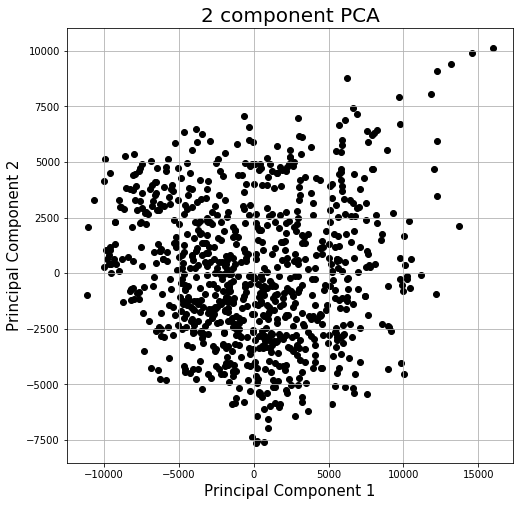

In [0]:
plot_pca(imgs45_pca)

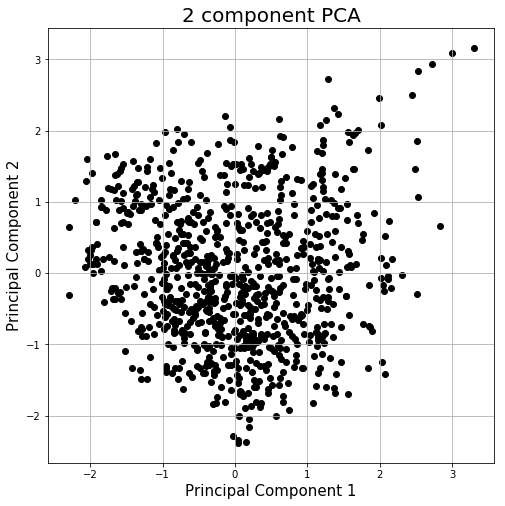

In [0]:
plot_pca(imgs45_pca_norm)

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
## output_pca를 통해 나온 데이터가 x로 들어간다.
def norm_scale(x) :
    from sklearn.preprocessing import QuantileTransformer
    ## 스케일링
    data = QuantileTransformer(output_distribution='normal').fit_transform(x)
    data_norm = pd.DataFrame(data,columns = ['principal component 1', 'principal component 2'])
    return(data_norm)

def norm_scale2(x) :
    from sklearn.preprocessing import StandardScaler
    ## 스케일링
    data = StandardScaler().fit_transform(x)
    data_norm = pd.DataFrame(data,columns = ['principal component 1', 'principal component 2'])
    return(data_norm)

## norm_scale을 거친 데이터가 x로 들어간다.
def dbscan_norm(x, eps = 0.5, min_samples = 5) :
    from sklearn.cluster import DBSCAN
    ## dbscan 적용
    db = DBSCAN(eps=eps, min_samples=min_samples)
    clustering = db.fit(np.array(x))
    print('군집 수 : ',len(set(clustering.labels_)))
    return(clustering)

## nrom_scale을 거친 데이터가 data, cluster는 dbscan_norm을 거친 결과가 cluster
def dbscan_plot(data, cluster) :
    labels = pd.DataFrame({'label' : cluster.labels_})
    data = data
    data = pd.concat([data, labels], axis=1)
    if data.shape[1] == 3 :
        print('Complete')
    plot_pca_label(data)

군집 수 :  2
Complete


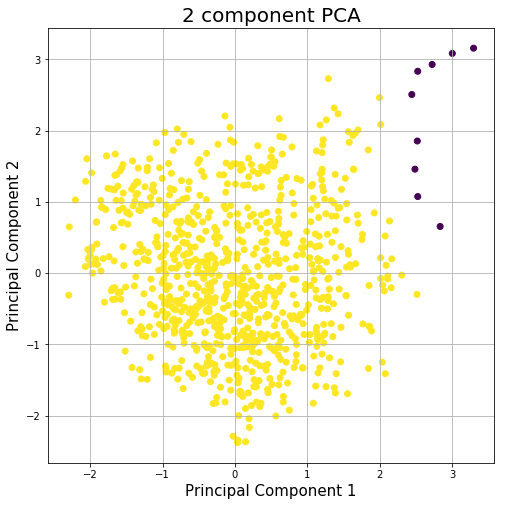

In [0]:
## 정규분포로 스케일링
imgs45_pca_norm = norm_scale2(imgs45_pca)
## DBSCAN 적용
clustering = dbscan_norm(imgs45_pca_norm)
## plot
dbscan_plot(imgs45_pca_norm,clustering)

군집 수 :  2
Complete


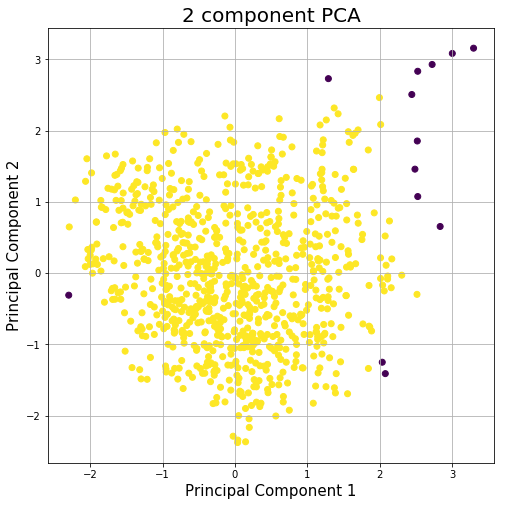

In [0]:
## DBSCAN 적용
clustering = dbscan_norm(imgs45_pca_norm, eps = 0.4)
## plot
dbscan_plot(imgs45_pca_norm,clustering)

군집 수 :  1
Complete


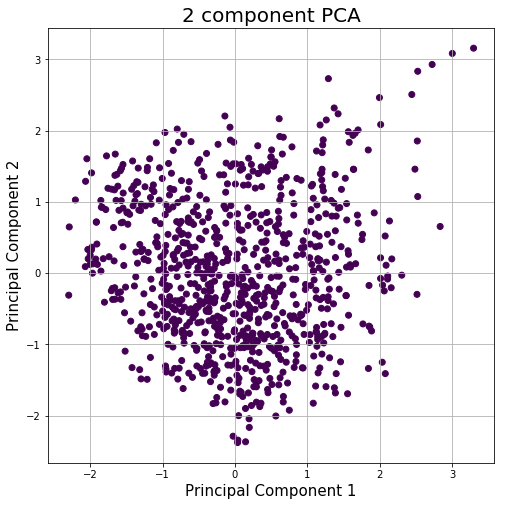

In [0]:
## DBSCAN 적용
clustering = dbscan_norm(imgs45_pca_norm, eps = 1)
## plot
dbscan_plot(imgs45_pca_norm,clustering)

In [0]:
## x는 dbscan_norm를 거친 clustering 데이터
## data는 norm_scale를 거친 아웃풋
## 코어데이터를 뽑아내는 과정
def extract_coreidx(x, data) :
    labels = pd.DataFrame({'label' : x.labels_})
    data =pd.concat([data, labels], axis=1)
    core_sample = x.core_sample_indices_
    row_idx = pd.DataFrame({'index' : data.axes[0].tolist()})
    tmp_data =pd.concat([row_idx, data], axis=1)
    
    ## 할당된 군집에서 제일 많은 개수를 갖는 군집을 선택함.
    cluster_count = []
    max_label = []
    for i in set(x.labels_) :
        cluster_count.append(tmp_data[tmp_data['label'] == i].shape[0])
    for i,_ in enumerate(cluster_count) :
        if max(cluster_count) == cluster_count[i] :
            print('max label은 ', i)
            max_label = i
            
    max_label_data = tmp_data[tmp_data['label'] == max_label]
    
    ## 중심부 클러스터의 core_data
    check_list = []
    for i in range(max_label_data['index'].shape[0]) :
        if np.array(max_label_data['index'])[i] in core_sample : 
            check_list.append(i)
    return(check_list)

In [0]:
check1 = extract_coreidx(clustering, imgs45_pca_norm)
np.array(check1)

max label은  0


array([   0,    1,    2, ..., 1126, 1127, 1128])

In [0]:
########아이디어: pca를 적용하는 이유- 음들을 비슷한 음,같은 음으로 묶기 위하여  , knn을 통해서 많이 안쳐지는 음을 
## 비슷한 음으로 대체해주기 위하여
#따라서 pca를 하는 대상인 스펙트럼이 음 외의 정보(시간정보)도 같고 있는 것은 pca에 악영향이 될 수 있다.
#그러므로 pca를 적용하기 전 스펙트럼을 시간정보를 삭제한 음의 정보만 갖게 하도록해야함.

In [0]:
#####one_take 방식을 생각해보자 
val_list[0]
class_list[0]
print(len(val_list))
print(len(class_list))

####여기서 부터는 'for pca대로 하는게 실제에 적용하기 더 쉬울 것 같다. '

966
966


In [0]:
import re

In [0]:
class_list[2]

'51_54_58_63_70_75_78_82'

In [0]:
###각 폴더에 대한 라벨링은 완성 이제 필요한 것은 그 폴더의 들어있는 모든 이미지에 대한 라벨링이 필요하다. 

In [0]:
find=re.findall("[0-9]+", class_list[0]) #1번 폴더의 이름에 들어가는 숫자를 전부 추출 
find
Y=np.zeros(len(val_list))
for k in range(len(find)):
        Y[list88.index(find[k])]=1
#Y #정상작동 확인. 딱 100에만 1이 들어간다. 

In [0]:
Y_list=[]

for i in range(len(class_list)):
    Y=np.zeros(len(list88))
    find=re.findall("[0-9]+", class_list[i]) #1번 폴더의 이름에 들어가는 숫자를 전부 추출 
    for k in range(len(find)):
        Y[list88.index(find[k])]=1
    for i in range(val_len_list[i]):
        Y_list.append(Y)

len(Y_list)

58291

In [0]:
len(val_list)

6746

In [0]:
Y_list

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [0]:
dataset=[]

for i in range(len(a)):
    for image_path in glob.glob(a[i]+"/*.jpg"): #####각 라벨 폴더에서 이미지 가져오가 
        im = imageio.imread(image_path)
        dataset.append(im)
    print('dataset'+ str(a[i][remove_len:])+'complete!')
print(len(dataset))

dataset100complete!
dataset31_43_55complete!
dataset31_43_67_70_74_79complete!
dataset32complete!
dataset33complete!
dataset33_45complete!
dataset33_45_59_66complete!
dataset33_45_61_67complete!
dataset34_46_53_58_62complete!
dataset36complete!
dataset36_48_60_63_67_72complete!
dataset36_48_63_67_72complete!
dataset36_48_79_84_87_91complete!
dataset36_79_84_87_91complete!
dataset37complete!
dataset37_44_49_53_61_65complete!
dataset37_49_67_70_75complete!
dataset37_49_87_91_94_99complete!
dataset37_61_66_70complete!
dataset37_65complete!
dataset37_67_70_75_79complete!
dataset37_68complete!
dataset37_71complete!
dataset38complete!
dataset38_45_50_54_57_62_66complete!
dataset38_50complete!
dataset38_50_54complete!
dataset38_50_54_57_62complete!
dataset38_50_57_62_66complete!
dataset38_50_59_71complete!
dataset38_50_60_68complete!
dataset38_50_60_70complete!
dataset38_50_62_66_69_74complete!
dataset38_50_62_67_71_74complete!
dataset38_50_64_71complete!
dataset38_50_66_72complete!
dataset38

dataset51complete!
dataset51_54_60_62complete!
dataset51_55_60complete!
dataset51_57_61_66complete!
dataset51_57_65complete!
dataset51_58complete!
dataset51_58_61_67complete!
dataset51_58_62complete!
dataset51_58_66complete!
dataset51_58_66_70complete!
dataset51_60complete!
dataset51_60_62complete!
dataset51_60_63_68complete!
dataset51_60_72complete!
dataset51_61_67_72complete!
dataset51_62complete!
dataset51_63_67_70complete!
dataset51_65complete!
dataset51_65_71complete!
dataset51_67complete!
dataset51_68_80complete!
dataset51_69complete!
dataset51_69_78complete!
dataset51_72complete!
dataset51_73complete!
dataset51_75complete!
dataset51_75_87complete!
dataset51_77complete!
dataset51_78_90complete!
dataset52complete!
dataset52_56_62_64complete!
dataset52_57_59_66complete!
dataset52_58complete!
dataset52_59_68_71complete!
dataset52_60complete!
dataset52_61complete!
dataset52_61_67complete!
dataset52_62_64_68_72complete!
dataset52_64complete!
dataset52_66_70complete!
dataset52_68_71com

dataset62complete!
dataset62_63_67complete!
dataset62_65_77complete!
dataset62_66complete!
dataset62_66_69complete!
dataset62_66_69_74complete!
dataset62_66_71_74_78complete!
dataset62_66_72_74_81complete!
dataset62_66_74_81_86complete!
dataset62_67_69complete!
dataset62_67_69_72_75complete!
dataset62_67_69_74complete!
dataset62_67_70complete!
dataset62_67_71complete!
dataset62_67_71_74complete!
dataset62_67_71_77_79complete!
dataset62_68_78complete!
dataset62_68_78_80complete!
dataset62_69_72complete!
dataset62_69_72_77complete!
dataset62_69_74_78_81_86complete!
dataset62_70complete!
dataset62_70_72_76_82complete!
dataset62_70_74complete!
dataset62_70_74_79complete!
dataset62_70_74_79_82complete!
dataset62_71complete!
dataset62_71_74complete!
dataset62_72complete!
dataset62_72_74_78_81complete!
dataset62_72_74_78_81_86complete!
dataset62_72_75complete!
dataset62_72_75_81complete!
dataset62_72_76complete!
dataset62_72_77_81_84complete!
dataset62_73complete!
dataset62_74complete!
datase

In [0]:
y = np.array(Y_list)
Y = np.eye(3)[y.astype(int)]

In [0]:
y.shape

(6293, 88)

In [0]:
len(Y_list[1])

88

In [0]:
Y.shape

(6293, 88, 3)

In [0]:
data_set=np.array(dataset)
Y_label=Y

In [0]:
data_set.shape

(6293, 224, 224, 3)

In [0]:
##############폴더만 있으면 이미지데이터와 라벨링을 구하는 것은 전부 구했다 .

##다만 knn pca를 구현하면 그건 폴더수가 달라질텐데 그것을 구현하는 것은 어떻게 할 것인지. 

####-----> 영제가 이것은 일단 제쳐두라고 주문.
##그럼 이게 실제로 모델에 잘들어가는지 확인해보자. 

In [0]:
####영제 모델링 적용 

In [0]:
from keras.backend.tensorflow_backend import set_session
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras import optimizers
from keras import backend as K
from keras.utils import to_categorical

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
classifier = Sequential()

classifier.add(Conv2D(8, (3, 3), activation = 'relu',kernel_initializer='he_normal',input_shape = (224,224,3))) # 222 * 222
classifier.add(BatchNormalization())
classifier.add(Conv2D(8, (3, 3), activation = 'relu',kernel_initializer='he_normal')) # 220 * 220
classifier.add(BatchNormalization())
classifier.add(Conv2D(8, (3, 3), activation = 'relu',kernel_initializer='he_normal')) # 218 * 218
classifier.add(BatchNormalization())
classifier.add(Conv2D(8, (3, 3), activation = 'relu',kernel_initializer='he_normal')) # 216 * 216
classifier.add(BatchNormalization())

classifier.add(AveragePooling2D(pool_size = (216, 216)))

classifier.add(Flatten())
classifier.add(Dense(units = 88, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 8)       32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 8)       584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 220, 220, 8)       32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 218, 218, 8)       584       
_________________________________________________________________
batch_normalization_3 (Batch (None, 218, 218, 8)       32        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 8)       584       
__________

In [0]:
#classifier.load_weights(weight_path + 'classifier_weights_1103_02.h5')

In [0]:
classifier.fit(data_set,y, epochs=5, batch_size = 32)

Epoch 1/5
3584/6293 [================>.............] - ETA: 1:06 - loss: 0.6417 - acc: 0.8899

KeyboardInterrupt: 